First, we need to load all of our libraries we will use for this project.

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.pipeline import make_pipeline

#### a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). 

In [34]:
df = pd.read_csv('data_set.csv')

In [35]:
df.shape

(7000, 18)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 18 columns):
Patient I.D.        7000 non-null int64
Age                 6401 non-null float64
Sex                 7000 non-null object
cp                  7000 non-null int64
trtbps              7000 non-null float64
chol                6376 non-null float64
fbs                 7000 non-null int64
restecg             7000 non-null int64
thalachh            7000 non-null object
Addiction           7000 non-null object
keratin_type        7000 non-null int64
Diabetes_type       7000 non-null object
Hemoglobin_level    7000 non-null int64
blood_group         7000 non-null object
Immunity_level      7000 non-null int64
Affected_portion    7000 non-null float64
Breath_ratio        6593 non-null float64
Survive             7000 non-null object
dtypes: float64(5), int64(7), object(6)
memory usage: 984.5+ KB


<strong>Inferences:</strong>
<ul>
    <li>Number of Numerical Columns : 10</li>
    <li>Number of Object Column : 5</li>
    <li>Tyoe of our Target Column : Object/Catagorical</li>

##### b.	Five-PointSummary

In [37]:
df.describe()

,Patient I.D.,Age,cp,trtbps,chol,fbs,restecg,keratin_type,Hemoglobin_level,Immunity_level,Affected_portion,Breath_ratio
count,7000.000000,6401.000000,7000.000000,7000.000000,6376.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,6593.000000
mean,3500.500000,60.390564,1.654286,14.096497,248.497664,1.676714,0.914429,1.555143,9.518857,2.517000,40.878998,40.465292
std,2020.870275,18.420775,1.061300,5.131444,10.323672,1.159972,0.709753,0.667956,2.285818,1.116834,11.183186,11.633303
min,1.000000,29.000000,0.000000,1.241648,212.122186,0.000000,0.000000,1.000000,6.000000,1.000000,1.242888,3.010000
25%,1750.750000,45.000000,1.000000,9.422638,240.673116,1.000000,0.000000,1.000000,8.000000,2.000000,33.232875,32.410000
50%,3500.500000,64.000000,2.000000,14.669709,249.221050,2.000000,1.000000,1.000000,10.000000,3.000000,40.948939,39.890000
75%,5250.250000,77.000000,3.000000,18.366243,255.371556,3.000000,1.000000,2.000000,12.000000,4.000000,48.629448,48.750000
max,7000.000000,91.000000,3.000000,27.644734,283.852277,3.000000,2.000000,3.000000,13.000000,4.000000,84.045723,86.030000


#### c.	Summarize observations for categorical variables 

In [38]:
df.select_dtypes(include = 'object').describe()

,Sex,thalachh,Addiction,Diabetes_type,blood_group,Survive
count,7000,7000,7000,7000,7000,7000
unique,2,6925,7,3,8,2
top,Male,?,Nicotine - type A,type 1,O+,Survived
freq,4889,76,1468,3670,2474,5915


##### d.	Checking for defects

In [10]:
df.isnull().sum()

Patient I.D.          0
Age                 599
Sex                   0
cp                    0
trtbps                0
chol                624
fbs                   0
restecg               0
thalachh              0
Addiction             0
keratin_type          0
Diabetes_type         0
Hemoglobin_level      0
blood_group           0
Immunity_level        0
Affected_portion      0
Breath_ratio        407
Survive               0
dtype: int64

In [17]:
df[['Age','chol','Breath_ratio']].head(3)

,Age,chol,Breath_ratio
0,29.0,240.859519,21.55
1,30.0,253.220968,24.23
2,29.0,237.148027,44.97


In [23]:
df.head(10)

,Patient I.D.,Age,Sex,cp,trtbps,chol,fbs,restecg,thalachh,Addiction,keratin_type,Diabetes_type,Hemoglobin_level,blood_group,Immunity_level,Affected_portion,Breath_ratio,Survive
0,1,29.0,Male,1,6.613849,240.859519,1,1,113.0895308,Nicotine - type A,3,type 2,7,O-,1,41.576901,21.55,Survived
1,2,30.0,Female,1,8.789486,253.220968,3,2,113.3518612,Nicotine - type A,2,type 1,6,B-,4,43.234092,24.23,Survived
2,3,29.0,Male,2,10.376325,237.148027,2,1,106.9501548,Drug-type B,2,type 3,8,B-,4,46.758422,44.97,Survived
3,4,30.0,Male,3,18.336148,245.179914,3,2,100.4835624,Alcohol,2,type 2,13,O+,2,47.254223,47.24,Survived
4,5,29.0,Female,1,17.285610,233.539891,2,2,122.7902658,Nicotine - type A,2,type 1,6,AB+,2,27.046348,28.74,Survived
5,6,29.0,Female,2,17.205195,NaN,1,1,103.5479271,Nicotine - type A,1,type 3,10,AB+,3,45.004488,20.31,Survived
6,7,30.0,Male,1,14.780510,238.549525,3,2,122.6897625,Nicotine - type A,2,type 3,13,A+,4,39.883274,45.88,Survived
7,8,30.0,Male,2,6.568641,NaN,3,0,106.116222,Nicotine - type B,1,type 2,12,B+,4,43.453112,25.88,Survived
8,9,29.0,Female,1,7.094333,NaN,3,0,103.4609639,others,2,type 2,11,A+,3,55.664308,35.71,Survived
9,10,30.0,Male,3,17.497357,265.696516,1,2,109.8886438,Alcohol,2,type 1,11,AB+,1,53.141213,52.08,Survived


In [25]:
df['Survive'].value_counts()

Survived       5915
Passed away    1085
Name: Survive, dtype: int64

#### Encoding the Data for further analysis

In [39]:
le = LabelEncoder()
o = OrdinalEncoder()

In [41]:
surv = {'Survived':0,'Passed away':1}

In [43]:
l = df.select_dtypes(include = 'object').drop(columns = ['Survive'],axis = 1).columns

for i in l:
    df[i] = le.fit_transform(df[i])


In [45]:
df.head()

,Patient I.D.,Age,Sex,cp,trtbps,chol,fbs,restecg,thalachh,Addiction,keratin_type,Diabetes_type,Hemoglobin_level,blood_group,Immunity_level,Affected_portion,Breath_ratio,Survive
0,1,29.0,1,1,6.613849,240.859519,1,1,3561,4,3,1,7,7,1,41.576901,21.55,Survived
1,2,30.0,0,1,8.789486,253.220968,3,2,3657,4,2,0,6,5,4,43.234092,24.23,Survived
2,3,29.0,1,2,10.376325,237.148027,2,1,1334,2,2,2,8,5,4,46.758422,44.97,Survived
3,4,30.0,1,3,18.336148,245.179914,3,2,59,0,2,1,13,6,2,47.254223,47.24,Survived
4,5,29.0,0,1,17.285610,233.539891,2,2,6229,4,2,0,6,2,2,27.046348,28.74,Survived


In [47]:
df['Survive'] = df['Survive'].map(surv)

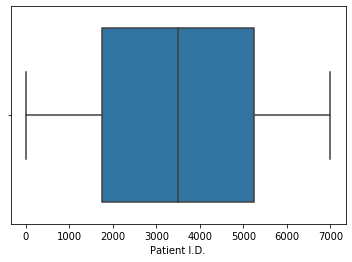

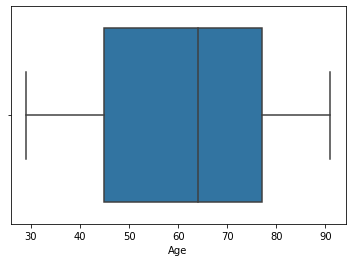

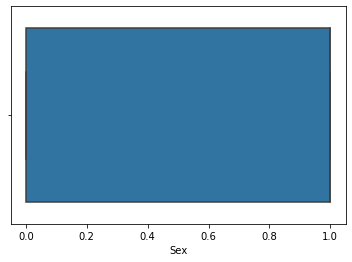

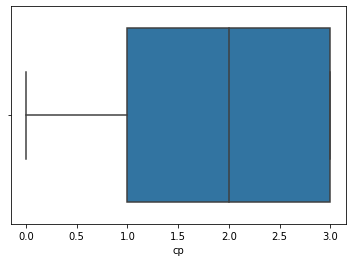

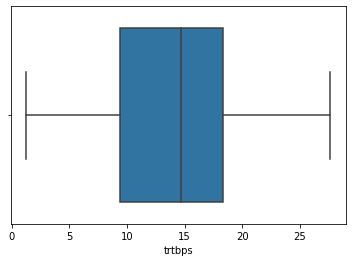

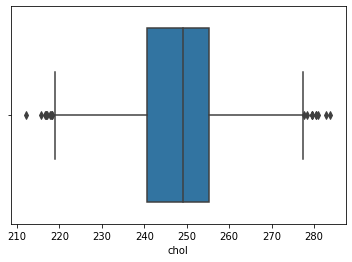

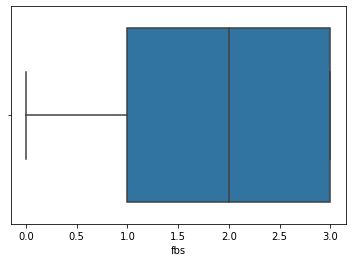

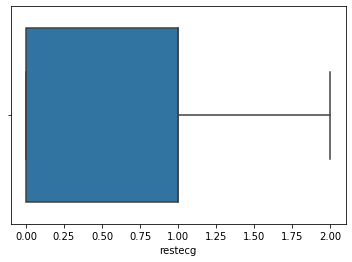

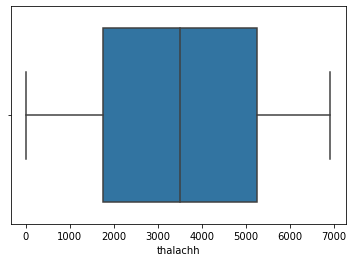

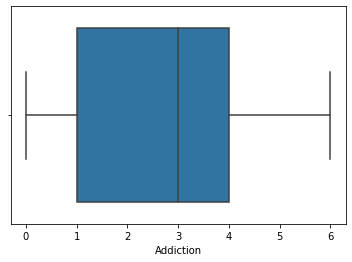

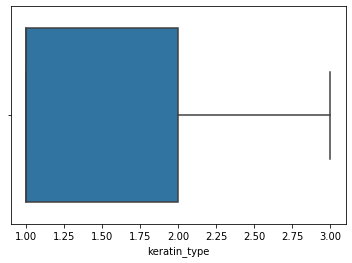

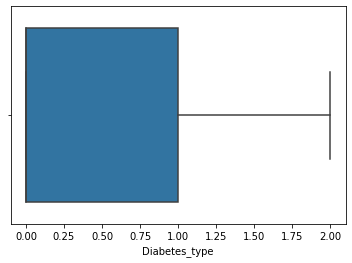

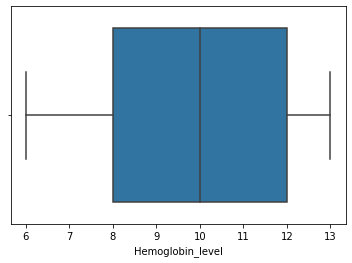

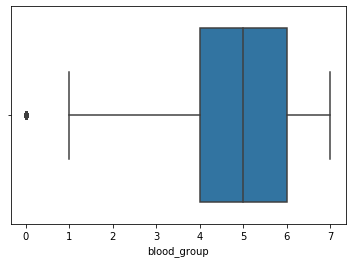

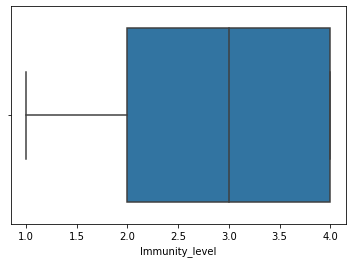

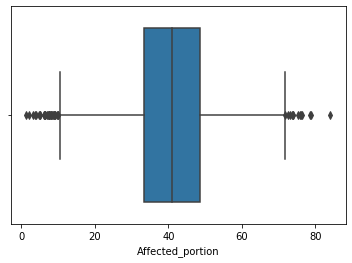

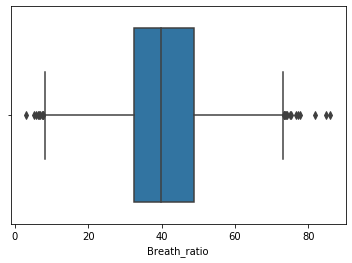

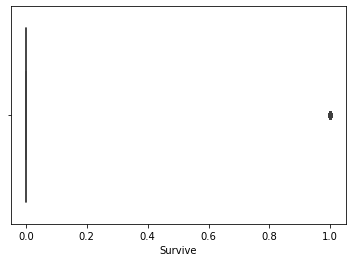

In [49]:
l = df.columns
for i in l:
    sns.boxplot(df[i],hue = df['Survive'])
    plt.show()

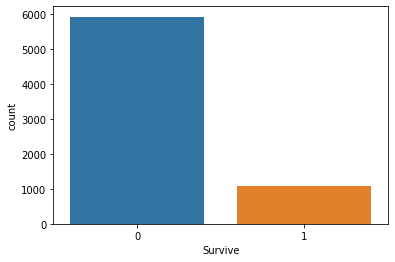

In [50]:
sns.countplot(df['Survive'])

Inferences:
    
    --> There are three columns that have missing values. Since they are easy to replace with mean/median values, we 
        shall do so
        
    -->Our Data has no significant outliers.
    
    -->There exists a significant class imbalance in the dataset and therefore it must be treated.
    
    -->Except the Null values, our data does not have any other missing values or too many zeros

##### a.	Fixing the defects

In [52]:
df['chol'].fillna(df['chol'].dropna().mean(),inplace = True)
df['Age'].fillna(df['Age'].dropna().mean(), inplace = True)
df['Breath_ratio'].fillna(df['Breath_ratio'].dropna().mean(), inplace = True)

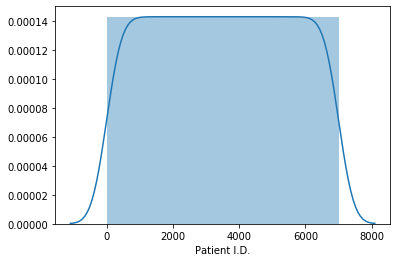

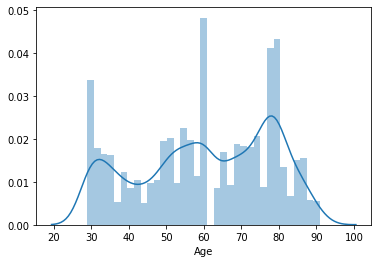

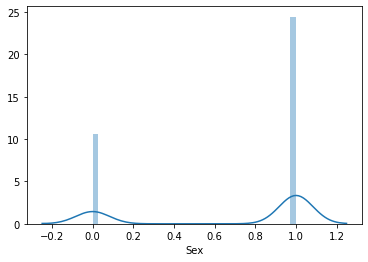

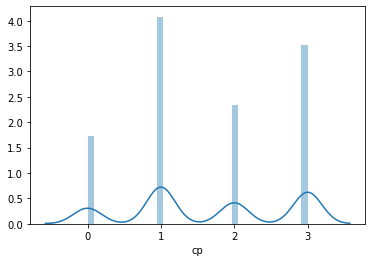

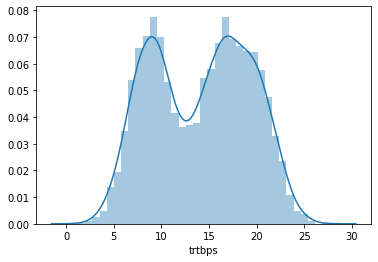

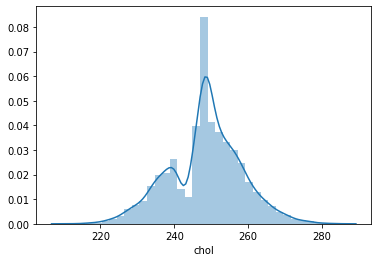

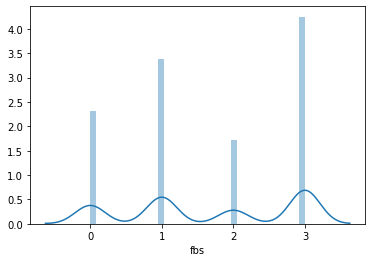

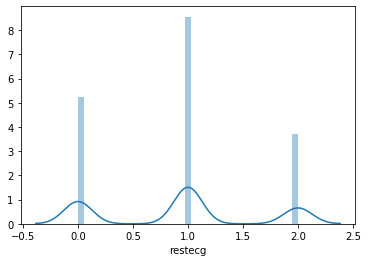

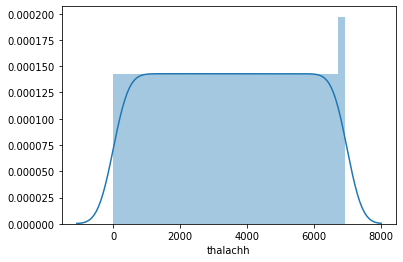

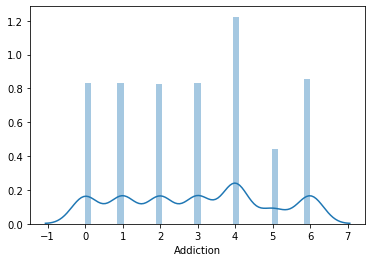

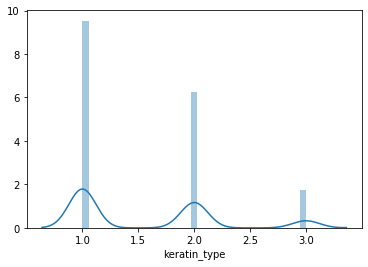

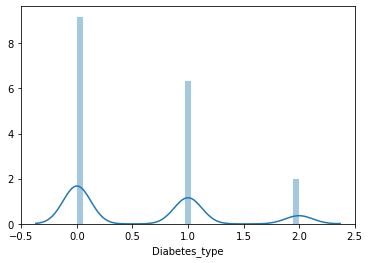

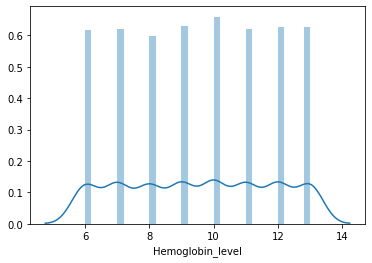

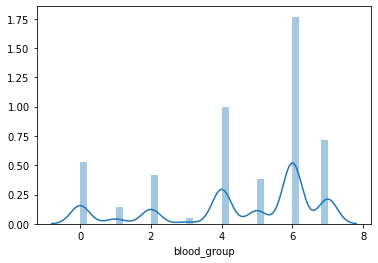

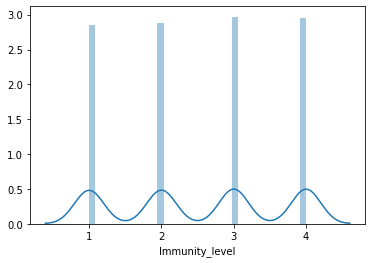

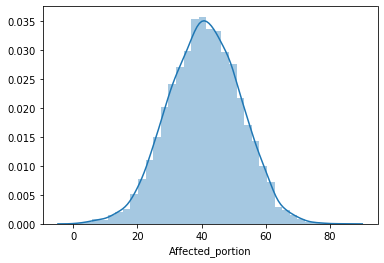

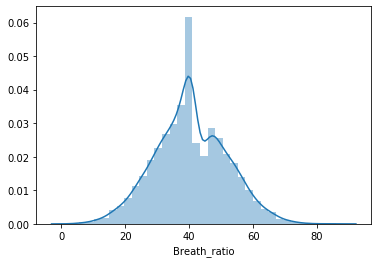

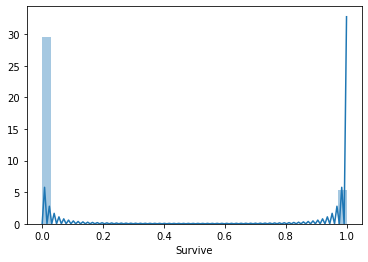

In [57]:
l = df.columns
for i in l:
    sns.distplot(df[i], bins = 35)
    plt.show()

After replacing the Null Values, we see that many columns have near-normal distributions. We have now treated most of the defects in the data since this data lacks significant outliers.

##### b.	Visualizing the Data.

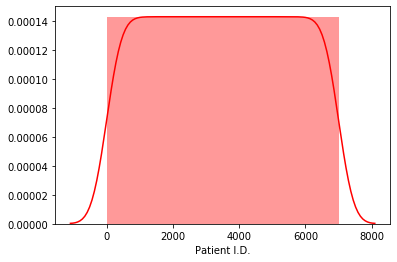

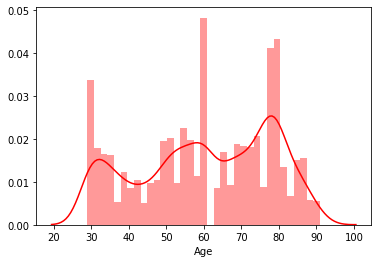

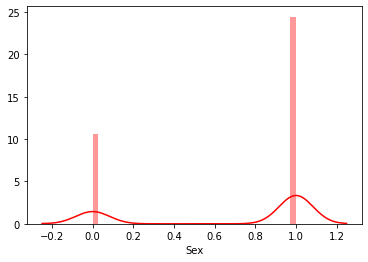

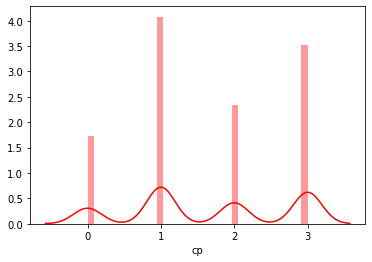

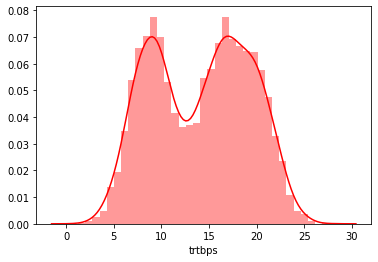

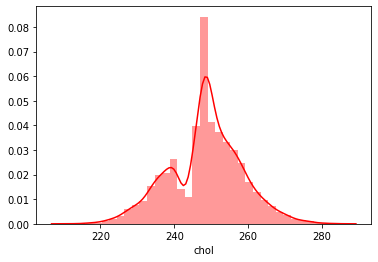

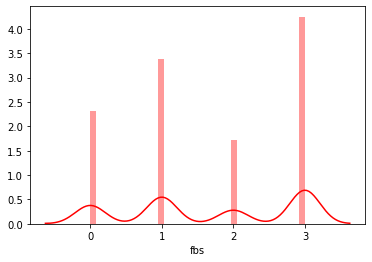

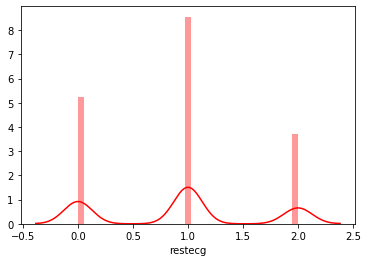

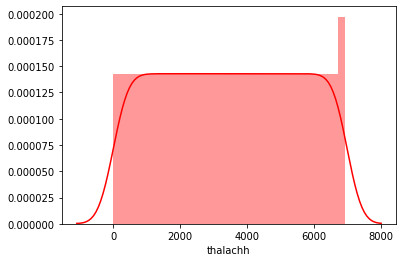

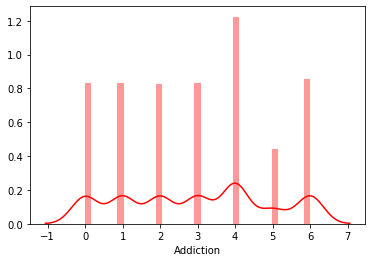

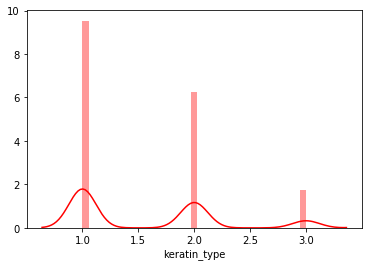

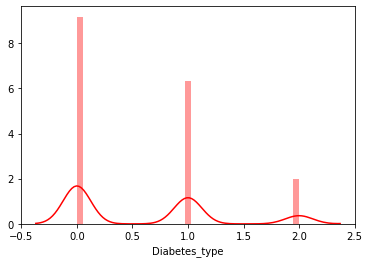

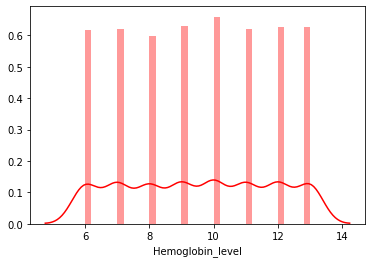

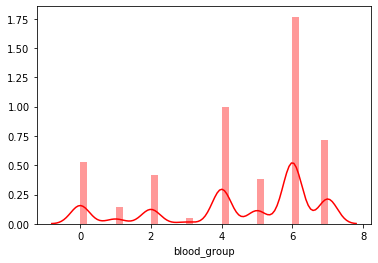

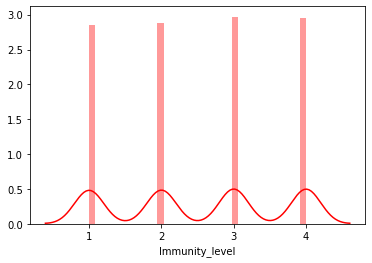

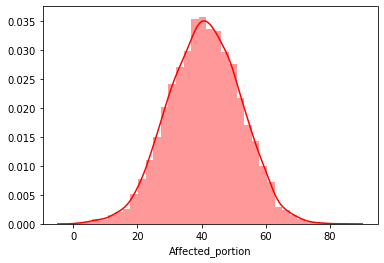

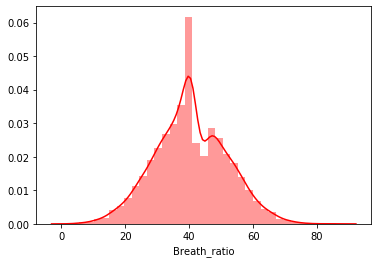

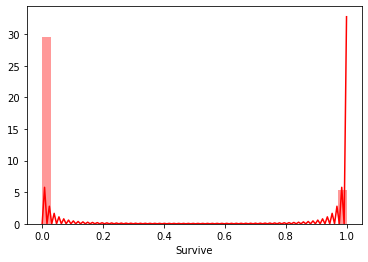

In [59]:
l = df.columns
for i in l:
    sns.distplot(df[i], bins = 35, color='r')
    plt.show()

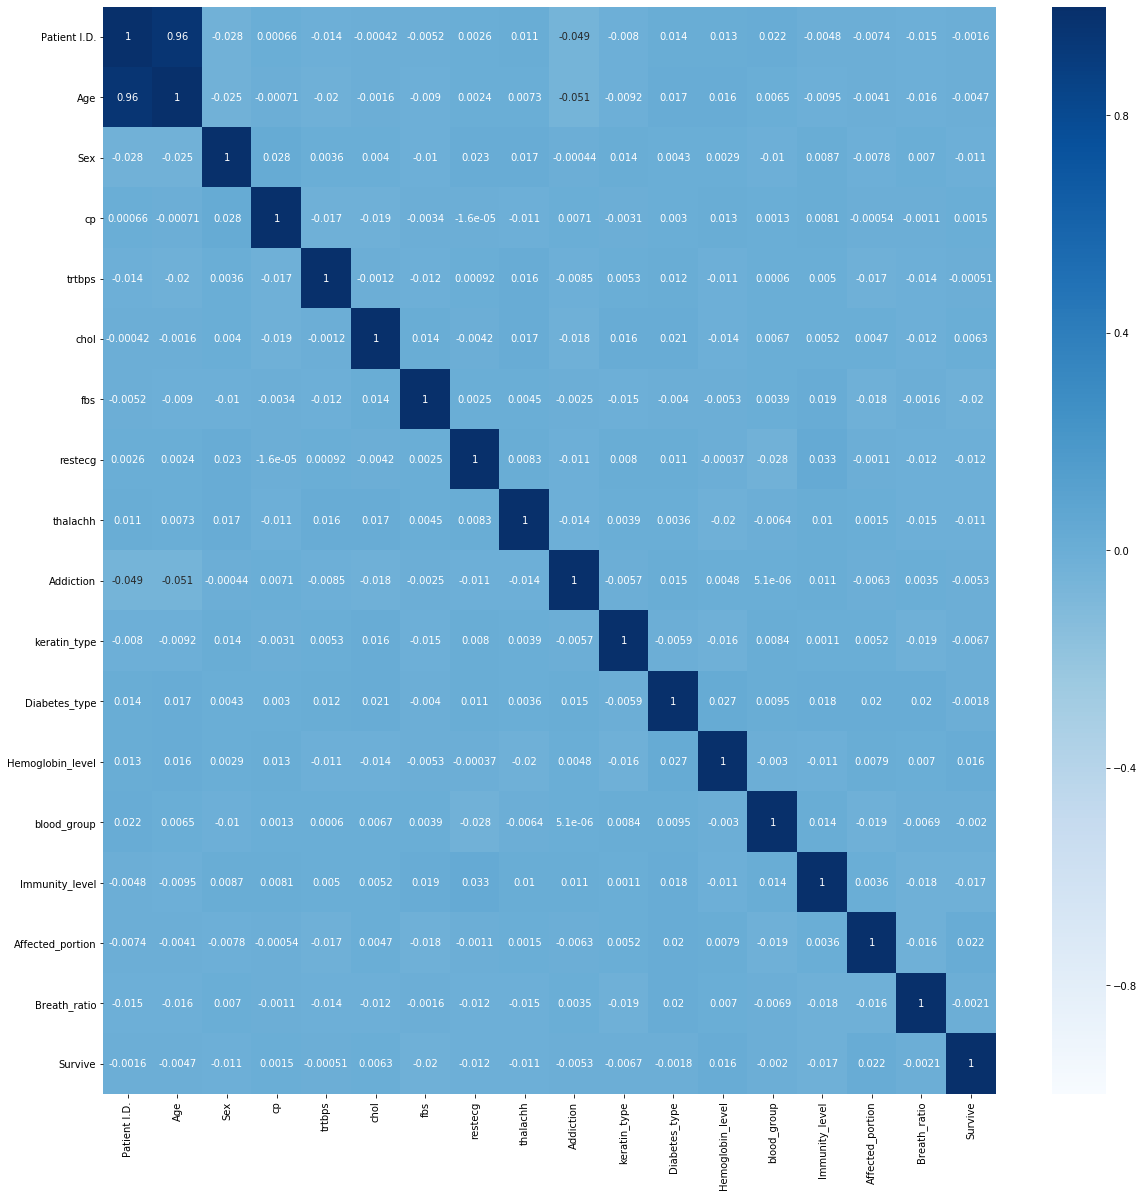

In [61]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, vmin = -1, cmap = 'Blues')

<b>Inference</b>
<ol>
    <li>There are no significantly strong positive or strong negatively correlated columns with out target variables.</li>
    <li>There seems to exist as strong correlation between Patient ID and Name</li>

##### c.	Excluding Irrelevant Variables.

The columns Patient ID is descriptive and unique to all patients. We therfore drop this column as it is not important to out model.

In [65]:
df.drop(columns = ['Patient I.D.'], axis = 1, inplace = True)

#### Since highly multicollinear columns can distort our business understanding of the model and our dataset, we drop these columns too.

In [67]:
X = df.drop(columns = ['Survive'], axis = 1)
y = df['Survive']

In [68]:
vif = pd.DataFrame()

vif['Columns'] = X.columns

vif['VIF Score'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif

,Columns,VIF Score
0,Age,12.578571
1,Sex,3.316991
2,cp,3.417908
3,trtbps,8.457554
4,chol,83.672317
5,fbs,3.087729
6,restecg,2.661106
7,thalachh,3.998343
8,Addiction,3.266260
9,keratin_type,6.394595


In [69]:
X.drop(columns = ['chol','Hemoglobin_level'], axis = 1, inplace = True)

We notice that the above two columns show very high multicollinearity. In order to not skew our business understanding of the model or the dataset, we drop these two columns.

##### d.	Split dataset into train and test (70:30)

In [212]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,stratify = y, random_state = 14,test_size = 0.3)

In [159]:
Xtrain.head()

,Age,Sex,cp,trtbps,fbs,restecg,thalachh,Addiction,keratin_type,Diabetes_type,blood_group,Immunity_level,Affected_portion,Breath_ratio
6457,81.0,1,1,17.168735,3,1,1818,2,3,0,4,2,42.805725,7.58
6782,82.0,1,1,15.446626,3,1,5730,4,3,0,4,4,63.259051,21.93
4280,72.0,1,0,21.872847,3,0,1896,0,1,0,0,3,23.669182,27.54
4915,73.0,1,1,6.276289,3,1,6924,0,2,0,2,1,26.235717,58.23
1536,44.0,1,3,18.490636,3,1,5370,6,3,0,4,1,39.986585,42.41


##### a. Fitting a base model.

The base model that I will build is the DecisionTreeClassifier. I am building this model as it provides a certain baseline metric for to build a model. Based on the result of the model, we can further fine-tune the feature selection, tranformation and hyper-parameter tuning process.

In [131]:
ds = DecisionTreeClassifier()

In [132]:
ds.fit(Xtrain.values,ytrain.values)

DecisionTreeClassifier()

In [133]:
ds.score(Xtrain,ytrain)

1.0

<b>Reasons</b>
<ul>
    <li>Decision Tree with default hyper parameters provides a good baseline model for all other tree based algorithms.</li>
    <li>We can further tune the hyper parameters of this algorithm further after seeing if the model is overfit or undersfit.</li>
    <li>This model provides us with a good general sense of how a tree based model will behave</li>
</ul>
<strong>We can now use this model as a baseline to change feature selection,extraction and model building strategies</strong>

##### b.	Base Model Evaluation.

In [134]:
y_test_ds_pred = ds.predict(Xtest)
y_train_ds_pred = ds.predict(Xtrain)

print('The accuracy of this model on Training Data:', accuracy_score(ytrain.values,y_train_ds_pred))
print('The precision of this model on Training Data:', precision_score(ytrain.values,y_train_ds_pred))
print('The recall of this model on Training Data:', recall_score(ytrain.values,y_train_ds_pred))
print('The F1 of this model on Training Data:', f1_score(ytrain.values,y_train_ds_pred))

The accuracy of this model on Training Data: 1.0
The precision of this model on Training Data: 1.0
The recall of this model on Training Data: 1.0
The F1 of this model on Training Data: 1.0


Inferences:

--> The model performs fairly well on the Training Dataset with an overall accuracy of the 100% This could mean that the model is severly overfit.

-->We can further finetune this while building a more advanced tree based algorithm.

-->The prcision,reall and F1 score of this algorithm are all 100%. This means that the model works perfectly on the training data and can correctly classify all the entries.

In [135]:
print('The accuracy of this model on Test Data:', accuracy_score(ytest.values,y_test_ds_pred))
print('The precision of this model on Test Data:', precision_score(ytest.values,y_test_ds_pred))
print('The recall of this model on Test Data:', recall_score(ytest,y_test_ds_pred))
print('The F1 of this model on Test Data:', f1_score(ytest,y_test_ds_pred))

The accuracy of this model on Test Data: 0.7147619047619047
The precision of this model on Test Data: 0.14728682170542637
The recall of this model on Test Data: 0.17484662576687116
The F1 of this model on Test Data: 0.1598877980364656


<b>Inferences</b>:
<ol>
    <li>The model performs significantly worse on the test data</li>
    <li>Our Inferences before were correct. The model was severly overfit. We now need to tune hyper-parameters and other aspects of our features in order to reduce model variance</li>

##### d.	Improving the model.

We notice from the above two cells that our base DecisionTree Model was highly overfit. This time around, we create a better model with better hyper parameters for our dataset.

<b>The step by step approach to building this model would be:</b>
<ol>
    <li>First Balance the dataset using Smote as an unbalanced dataset means a skewed understanding of overall accuracy</li>
    <li>Fine tune to variables and get them to scale using StandardScaler as variables of different scales make it difficult for an algorithm to train correctly</li>
    <li>Tune the Hyper-Parameters of the Decision Tree Algorithm so that it is less overfit and performs well on both the training and the test data.</li>
    <li>Create another more complicated tree based algorithm called random forest in-order to build a stronger intuition of the dataset and choose the better model</li>

In [247]:
oversampling = SMOTE(k_neighbors=12)
Xtrain,ytrain = oversampling.fit_resample(Xtrain,ytrain)

In [248]:
sc = StandardScaler()
ds2 = DecisionTreeClassifier(min_samples_split=9,max_depth=14,min_samples_leaf=5)
model = make_pipeline(sc,ds2)

In [249]:
model.fit(Xtrain,ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=14, min_samples_leaf=5,
                                        min_samples_split=9))])

<b>Our New model has now been created</b>

Using the make_pipelines function, the whole model uses both Standard Scaler are the Decision Tree algroithm with better hyper-parameters.

This will make the model perform better on the Test Data.

In [250]:
y_test_model_pred = model.predict(Xtest)
y_train_model_pred = model.predict(Xtrain)

print('The accuracy of this model on Training Data:', accuracy_score(ytrain.values,y_train_model_pred))
print('The precision of this model on Training Data:', precision_score(ytrain.values,y_train_model_pred))
print('The recall of this model on Training Data:', recall_score(ytrain.values,y_train_model_pred))
print('The F1 of this model on Training Data:', f1_score(ytrain.values,y_train_model_pred))

The accuracy of this model on Training Data: 0.8524510987684134
The precision of this model on Training Data: 0.8439783172283761
The recall of this model on Training Data: 0.8647669645013282
The F1 of this model on Training Data: 0.8542461832061069


<b>Inferences:</b>
<ul>
    <li>The overall accuracy of this model has fallen on the training data as compared to the previous model.</li>
    <li>This indicates a good sign as it means that the model is less overfit and will provide a better generalization over the test data.</li>
    
Let us now try this model on the test data to see if it is less overfit and can generalise well.

In [251]:
print('The accuracy of this model on Test Data:', accuracy_score(ytest.values,y_test_model_pred))
print('The precision of this model on Test Data:', precision_score(ytest.values,y_test_model_pred))
print('The recall of this model on Test Data:', recall_score(ytest,y_test_model_pred))
print('The F1 of this model on Test Data:', f1_score(ytest,y_test_model_pred))

The accuracy of this model on Test Data: 0.6328571428571429
The precision of this model on Test Data: 0.14285714285714285
The recall of this model on Test Data: 0.27300613496932513
The F1 of this model on Test Data: 0.18756585879873552


Inferences:

-->The overall precision and recall of this model did rise after oversampling and retraining. Although the accuracy is still not very high.

-->This may be an indication that the Decision Tree algorithm is not a very good fit for this dataset.

### Random Forest Algorithm

In [257]:
rf= RandomForestClassifier(max_depth=5)

In [258]:
model2 = make_pipeline(sc,rf)

In [259]:
model2.fit(Xtrain,ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5))])

In [260]:
y_test_model2_pred = model.predict(Xtest)
y_train_model2_pred = model.predict(Xtrain)

print('The accuracy of this model on Training Data:', accuracy_score(ytrain.values,y_train_model2_pred))
print('The precision of this model on Training Data:', precision_score(ytrain.values,y_train_model2_pred))
print('The recall of this model on Training Data:', recall_score(ytrain.values,y_train_model2_pred))
print('The F1 of this model on Training Data:', f1_score(ytrain.values,y_train_model2_pred))

The accuracy of this model on Training Data: 0.8524510987684134
The precision of this model on Training Data: 0.8439783172283761
The recall of this model on Training Data: 0.8647669645013282
The F1 of this model on Training Data: 0.8542461832061069


In [261]:
print('The accuracy of this model on Test Data:', accuracy_score(ytest.values,y_test_model2_pred))
print('The precision of this model on Test Data:', precision_score(ytest.values,y_test_model2_pred))
print('The recall of this model on Test Data:', recall_score(ytest,y_test_model2_pred))
print('The F1 of this model on Test Data:', f1_score(ytest,y_test_model2_pred))

The accuracy of this model on Test Data: 0.6328571428571429
The precision of this model on Test Data: 0.14285714285714285
The recall of this model on Test Data: 0.27300613496932513
The F1 of this model on Test Data: 0.18756585879873552


The overall precision and recall have stayed the same. WE can try more trees of a different alg.

##### e.	Write down a business interpretation/explanation of the model.

In [234]:
features = pd.DataFrame()
features['Columns'] = Xtrain.columns
features['Importance'] = ds2.feature_importances_
features.sort_values(by = 'Importance', ascending=False,inplace = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

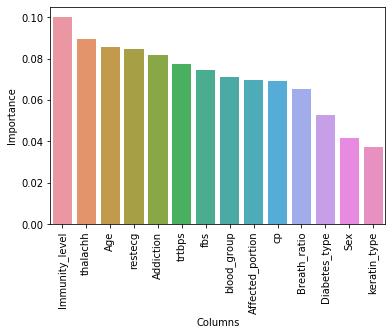

In [235]:
sns.barplot(x= features['Columns'],y = features['Importance'])
plt.xticks(rotation = 90)

Inferences:

-->It is visible that the most important feautre when it comes to predicting if a patient survives or not is their immunity level. This makes logical sense as in the real world, immunity matters a lot when it comes to combating the Corona Virus.

-->Keratin Type remain the column that is least helpfull in predicting whether a will survive or not. This gives insight ot healthcare professionals to focus less on the keratin type of a patient when dealing with their conditions.